In [45]:
import pandas as pd

In [46]:
df=pd.read_csv('MSFT.csv')

In [47]:
df

Date        Open        High         Low       Close   Adj Close  \
0    2023-04-11  285.750000  285.980011  281.640015  282.829987  280.527588   
1    2023-04-12  284.790009  287.010010  281.959991  283.489990  281.182220   
2    2023-04-13  283.589996  289.899994  283.170013  289.839996  287.480530   
3    2023-04-14  287.000000  288.480011  283.690002  286.140015  283.810699   
4    2023-04-17  289.929993  291.600006  286.160004  288.799988  286.449005   
..          ...         ...         ...         ...         ...         ...   
247  2024-04-04  424.989990  428.670013  417.570007  417.880005  417.880005   
248  2024-04-05  420.010010  426.510010  418.320007  425.519989  425.519989   
249  2024-04-08  425.170013  427.279999  423.299988  424.589996  424.589996   
250  2024-04-09  426.440002  427.739990  421.619995  426.279999  426.279999   
251  2024-04-10  422.190002  424.029999  419.700012  423.260010  423.260010   

       Volume  
0    27276600  
1    27403400  
2    24222700  
3    20987900  
4    23836200  
..        ...  
247  19370900  
248  16544300  
249  14272400  
250  12512300  
251  16202100  

[252 rows x 7 columns]

In [48]:
df = df [['Date', 'Close']]

In [49]:
df

Date       Close
0    2023-04-11  282.829987
1    2023-04-12  283.489990
2    2023-04-13  289.839996
3    2023-04-14  286.140015
4    2023-04-17  288.799988
..          ...         ...
247  2024-04-04  417.880005
248  2024-04-05  425.519989
249  2024-04-08  424.589996
250  2024-04-09  426.279999
251  2024-04-10  423.260010

[252 rows x 2 columns]

In [50]:
import datetime

In [51]:
def str_to_datetime(s):
    split=s.split('-')
    year, month, day= int (split[0]),int (split[1]), int (split[2])
    return datetime.datetime(year= year, month= month, day=day)

datetime_object=str_to_datetime('1987-04-06')
datetime_object 

datetime.datetime(1987, 4, 6, 0, 0)

In [52]:
df

Date       Close
0    2023-04-11  282.829987
1    2023-04-12  283.489990
2    2023-04-13  289.839996
3    2023-04-14  286.140015
4    2023-04-17  288.799988
..          ...         ...
247  2024-04-04  417.880005
248  2024-04-05  425.519989
249  2024-04-08  424.589996
250  2024-04-09  426.279999
251  2024-04-10  423.260010

[252 rows x 2 columns]

In [53]:
df['Date']= df['Date'].apply (str_to_datetime)
df['Date']

C:\Users\B K\AppData\Local\Temp\ipykernel_15240\1833051119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply (str_to_datetime)


0     2023-04-11
1     2023-04-12
2     2023-04-13
3     2023-04-14
4     2023-04-17
         ...    
247   2024-04-04
248   2024-04-05
249   2024-04-08
250   2024-04-09
251   2024-04-10
Name: Date, Length: 252, dtype: datetime64[ns]

In [54]:
df

Date       Close
0   2023-04-11  282.829987
1   2023-04-12  283.489990
2   2023-04-13  289.839996
3   2023-04-14  286.140015
4   2023-04-17  288.799988
..         ...         ...
247 2024-04-04  417.880005
248 2024-04-05  425.519989
249 2024-04-08  424.589996
250 2024-04-09  426.279999
251 2024-04-10  423.260010

[252 rows x 2 columns]

In [56]:
df.index = df.pop('Date')
df

Close
Date                  
2023-04-11  282.829987
2023-04-12  283.489990
2023-04-13  289.839996
2023-04-14  286.140015
2023-04-17  288.799988
...                ...
2024-04-04  417.880005
2024-04-05  425.519989
2024-04-08  424.589996
2024-04-09  426.279999
2024-04-10  423.260010

[252 rows x 1 columns]

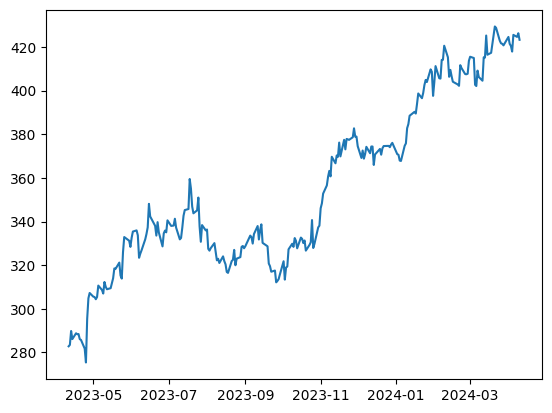

In [58]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [65]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2023-04-14', 
                                '2023-005-17', 
                                n=3)
windowed_df

Target Date    Target-3    Target-2    Target-1      Target
0   2023-04-14  282.829987  283.489990  289.839996  286.140015
1   2023-04-17  283.489990  289.839996  286.140015  288.799988
2   2023-04-18  289.839996  286.140015  288.799988  288.369995
3   2023-04-19  286.140015  288.799988  288.369995  288.450012
4   2023-04-20  288.799988  288.369995  288.450012  286.109985
5   2023-04-21  288.369995  288.450012  286.109985  285.760010
6   2023-04-24  288.450012  286.109985  285.760010  281.769989
7   2023-04-25  286.109985  285.760010  281.769989  275.420013
8   2023-04-26  285.760010  281.769989  275.420013  295.369995
9   2023-04-27  281.769989  275.420013  295.369995  304.829987
10  2023-04-28  275.420013  295.369995  304.829987  307.260010
11  2023-05-01  295.369995  304.829987  307.260010  305.559998
12  2023-05-02  304.829987  307.260010  305.559998  305.410004
13  2023-05-03  307.260010  305.559998  305.410004  304.399994
14  2023-05-04  305.559998  305.410004  304.399994  305.410004
15  2023-05-05  305.410004  304.399994  305.410004  310.649994
16  2023-05-08  304.399994  305.410004  310.649994  308.649994
17  2023-05-09  305.410004  310.649994  308.649994  307.000000
18  2023-05-10  310.649994  308.649994  307.000000  312.309998
19  2023-05-11  308.649994  307.000000  312.309998  310.109985
20  2023-05-12  307.000000  312.309998  310.109985  308.970001
21  2023-05-15  312.309998  310.109985  308.970001  309.459991
22  2023-05-16  310.109985  308.970001  309.459991  311.739990
23  2023-05-17  308.970001  309.459991  311.739990  314.000000

In [66]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((24,), (24, 3, 1), (24,))

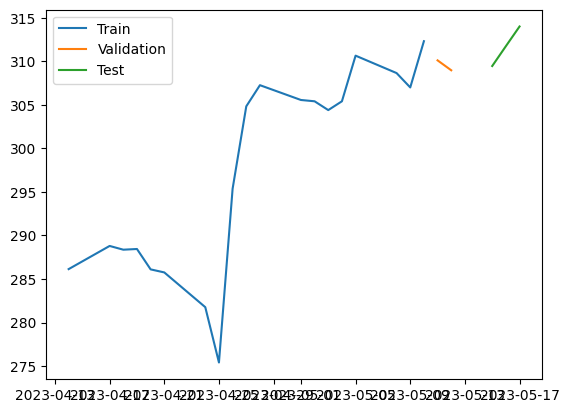

In [67]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [79]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

ModuleNotFoundError: No module named 'distutils'

In [76]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

NameError: name 'model' is not defined

In [80]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

NameError: name 'model' is not defined

In [81]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

NameError: name 'model' is not defined

In [83]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

NameError: name 'train_predictions' is not defined

In [84]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

NameError: name 'model' is not defined

In [85]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

NameError: name 'train_predictions' is not defined